## Model 1 Fit Results

In [2]:
setwd("/global/project/projectdirs/m1532/Projects_MVP/geospatial/GeoSpatial_Model/spatial-prediction")

In [3]:
library(CARBayesST)
library(tidyverse)

Loading required package: MASS

Loading required package: Rcpp

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()


In [4]:
fit1 <- readRDS("outputs/model_results/model_2022-09-13.rds")

In [5]:
#get fips to keep 

# Note: United States total includes 3,006 counties;
## Loading dataset and geometries ###
vars <- read_csv("data/processed/combined.csv")
# change this to the number of years that 
# you are considering in your dataset.
NUMBER_OF_YEARS <- length(unique(vars$year))


county <- sf::read_sf(
    dsn = "data/shapefile/cb_2020_us_tract_500k",
    layer = "cb_2020_us_tract_500k"
)

county <- county %>%
    mutate(FIPSCODE = paste0(STATEFP, COUNTYFP)) %>% 
    arrange(FIPSCODE) %>%
    distinct(FIPSCODE, .keep_all = TRUE)

df <- county %>% inner_join(vars, on=FIPSCODE)

df_nona <- df %>% na.omit(suicide_rate) %>%
  group_by(FIPSCODE) %>% 
  mutate(name_count = n()) %>%
  ungroup() %>% 
  filter(name_count == NUMBER_OF_YEARS) %>% 
  dplyr::select(-name_count) %>%
  arrange(desc(year), FIPSCODE)

fips_to_keep <- df_nona %>% 
    distinct(FIPSCODE) %>% 
    pull(FIPSCODE)


Rows: 9089 Columns: 103
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): FIPSCODE, county
dbl (101): deaths, ACS_PCT_GRP_QRT, ACS_PCT_PRIVATE_2, mean_temp, ACS_PCT_ME...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“PROJ: proj_identify: Open of /global/homes/b/bbrusco/.conda/envs/r-venv/share/proj failed (GDAL error 1)”
Joining, by = "FIPSCODE"


In [6]:
fit1$summary.results

,Mean,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
(Intercept),-8.2772,-9.5180,-7.1086,70000,42.7,124.9,0.1
ACS_PCT_GRP_QRT,1.3944,0.6640,2.1392,70000,42.7,183.6,-0.6
ACS_PCT_PRIVATE_2,0.8034,-1.0531,2.6746,70000,42.7,604.9,1.1
mean_temp,0.1413,-0.0831,0.3623,70000,42.7,188.4,1.0
ACS_PCT_MEDICARE_ONLY,1.7426,0.4376,3.0053,70000,42.7,341.3,-0.7
ACS_PCT_PRIVATE_SELF,1.9466,1.1885,2.7021,70000,42.7,209.7,-0.7
ACS_PCT_MOBILE_HOME,0.4071,0.0985,0.7268,70000,42.7,152.3,-0.8
NHC_DAILY_RES,-1.5537,-1.8990,-1.1287,70000,42.7,76.9,0.0
ACS_PCT_NON_CITIZEN,-1.4543,-2.4076,-0.4150,70000,42.7,88.1,-2.0
ACS_PCT_TRICARE_VA,0.7835,-0.5165,2.0872,70000,42.7,196.1,-0.3


#### Comments:
- rho.S -> spatial dependence parameter
- rho.T -> temporal dependence parameter

- In the summary ouput each coefficient has the mean of the posterior distribution alongisde 95% credibility interval.


In [ ]:
str(fit1$samples)

List of 6
 $ beta  : 'mcmc' num [1:70000, 1:88] -8.05 -8.1 -8.04 -8.03 -7.97 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ phi   : 'mcmc' num [1:70000, 1:9087] -0.0123 0.0526 0.0724 0.0728 0.0709 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ rho   : 'mcmc' num [1:70000, 1:2] 0.469 0.484 0.492 0.465 0.465 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "rho.S" "rho.T"
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ tau2  : 'mcmc' num [1:70000, 1] 0.173 0.175 0.175 0.181 0.178 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ fitted: 'mcmc' num [1:70000, 1:9087] 13.3 14.4 15 14.9 15 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ Y     : 'mcmc' logi NA
  ..- attr(*, "mcpar")= num [1:3] 1 1 1


In [9]:
true_values <- read_csv("data/raw/suicide/2018.csv", show_col_types=F) %>%
        filter(fips %in% fips_to_keep) %>%
        arrange(fips) %>%
        select(Deaths) %>%
        pull()


In [10]:
fitted_values <- fit1$fitted[6059:9087]

In [11]:
results_df <- tibble(
    fitted_values = fitted_values,
    true_values = true_values,
    FIPSCODE = fips_to_keep
)


In [12]:
top_true <- results_df %>%
    arrange(desc(true_values)) %>%
    head(6) %>%
    mutate(top5_true = 1)
top_true

fitted_values,true_values,FIPSCODE,top5_true
<dbl>,<dbl>,<chr>,<dbl>
843.5941,947,06037,1
690.5829,737,04013,1
490.4816,481,48201,1
417.6552,465,32003,1
425.9901,459,17031,1
415.7551,448,06073,1


In [13]:
top_fitted <- results_df %>%
    arrange(desc(fitted_values)) %>%
    head(6)
top_fitted

fitted_values,true_values,FIPSCODE
<dbl>,<dbl>,<chr>
843.5941,947,06037
690.5829,737,04013
490.4816,481,48201
425.9901,459,17031
417.6552,465,32003
415.7551,448,06073


# Coefficients
Order by effect size of the coefficient (note: coefficients have not been standardized)

In [14]:
fit1$summary %>%
    as_tibble(rownames=NA) %>%
    arrange(desc(abs(Mean)))

,Mean,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-8.2772,-9.5180,-7.1086,70000,42.7,124.9,0.1
ACS_PCT_WHOLESALE,4.7417,3.1937,6.3336,70000,42.7,429.8,-2.0
CCBP_RATE_CS_PER_1000,-3.8931,-9.3049,1.0028,70000,42.7,59.2,0.6
ACS_PCT_AGE_0_17,3.7716,2.5066,5.1715,70000,42.7,86.0,-0.3
ACS_PCT_PRIVATE_MDCR,-3.4639,-5.0727,-1.9323,70000,42.7,292.5,2.0
ACS_PCT_NATURE,3.4622,2.8264,4.4416,70000,42.7,5.3,-1.7
ACS_PCT_PUBLIC_OTHER,3.1189,-1.3870,7.6853,70000,42.7,302.5,-0.1
ACS_PCT_ADMIN,3.1039,2.1740,4.2271,70000,42.7,174.4,-6.0
ACS_PCT_AGE_0_4,-3.0799,-5.7081,-0.4474,70000,42.7,232.5,-0.2


# Residuals Analysis

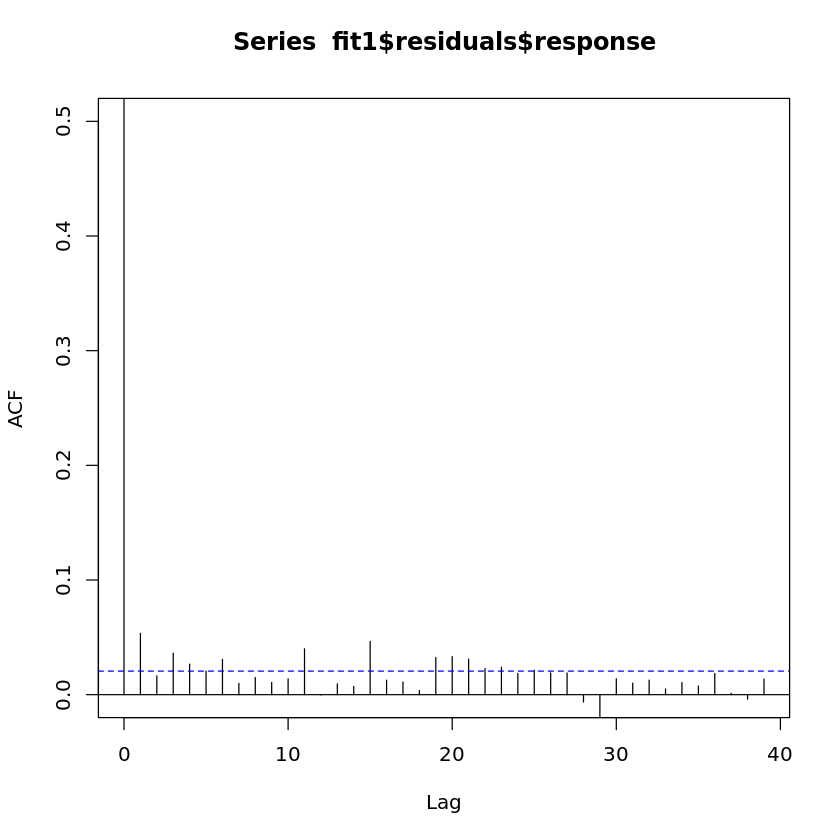

In [70]:
acf(fit1$residuals$response,type="correlation",ylim=c(0,0.5))
# some residual correlation at various lags in the residuals , might indicate that 
# some correlation is not fully captured.

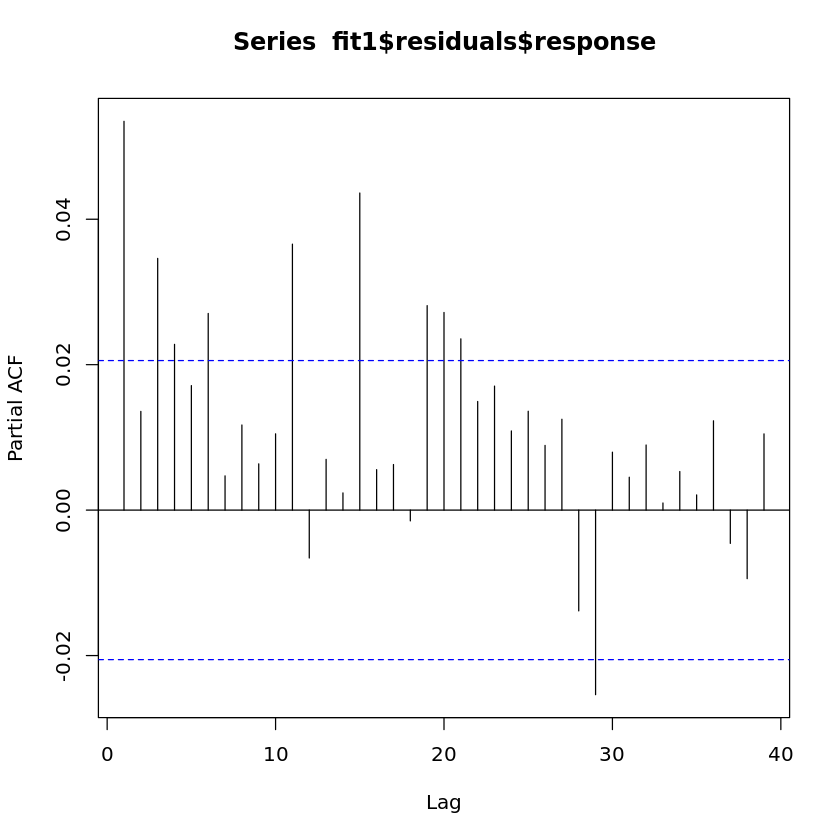

In [71]:
acf(fit1$residuals$response,type="partial")
# less so with partial

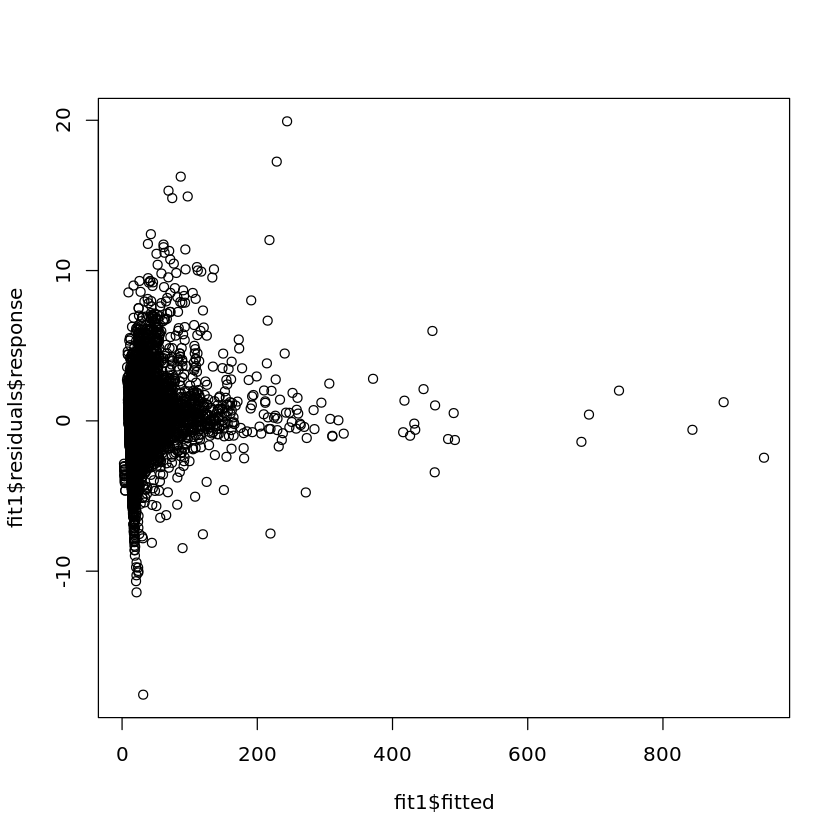

In [17]:
plot(fit1$fitted, fit1$residuals$response)
# some residual correlation is still present - can try AR2

In [44]:
## Rates

demographic_info <- read_csv("data/raw/demo/2020-demographic-info.csv")
demographic_info <- demographic_info %>%
    mutate(FIPSCODE = paste0(STATE, COUNTY)) %>%
    select(FIPSCODE, CENSUS2010POP) %>%
    rename(pop=CENSUS2010POP) %>%
    mutate(pop=as.numeric(pop))

results_df <- results_df %>% 
    merge(demographic_info) %>%
    mutate(true_rate1000 = true_values / pop * 1000,
           fit_rate1000 = fitted_values / pop * 1000)


Rows: 3194 Columns: 180
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (6): SUMLEV, STATE, COUNTY, STNAME, CTYNAME, CENSUS2010POP
dbl (174): REGION, DIVISION, ESTIMATESBASE2010, POPESTIMATE2010, POPESTIMATE...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


[1] 13.71173

[1] 1.999662

In [51]:
results_df %>%
    arrange(desc(true_rate1000)) %>%
    head(5)
# top 5 FIPSCODE by true rate (by 1000) 

,FIPSCODE,pop,fitted_values,true_values,true_rate1000,fit_rate1000
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20071,1247,101.78281,101.88889,81.70721,81.62214
2,30069,494,39.99080,38.00000,76.92308,80.95304
3,20199,1485,111.56780,113.12500,76.17845,75.12983
4,31005,460,12.67720,33.11111,71.98068,27.55913
5,08061,1398,88.68336,90.44444,64.69560,63.43588


In [52]:
results_df %>%
    arrange(desc(fit_rate1000)) %>%
    head(5) 
# top 5 FIPSCODE by fitted rate (by 1000) 

,FIPSCODE,pop,fitted_values,true_values,true_rate1000,fit_rate1000
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20071,1247,101.78281,101.88889,81.70721,81.62214
2,30069,494,39.99080,38.00000,76.92308,80.95304
3,20199,1485,111.56780,113.12500,76.17845,75.12983
4,31085,967,62.14554,49.07500,50.74974,64.26633
5,08061,1398,88.68336,90.44444,64.69560,63.43588


In [73]:
# the two dataframes above print the top rates sorted by true and fitted values.
# These can be used to identify areas of high risk.

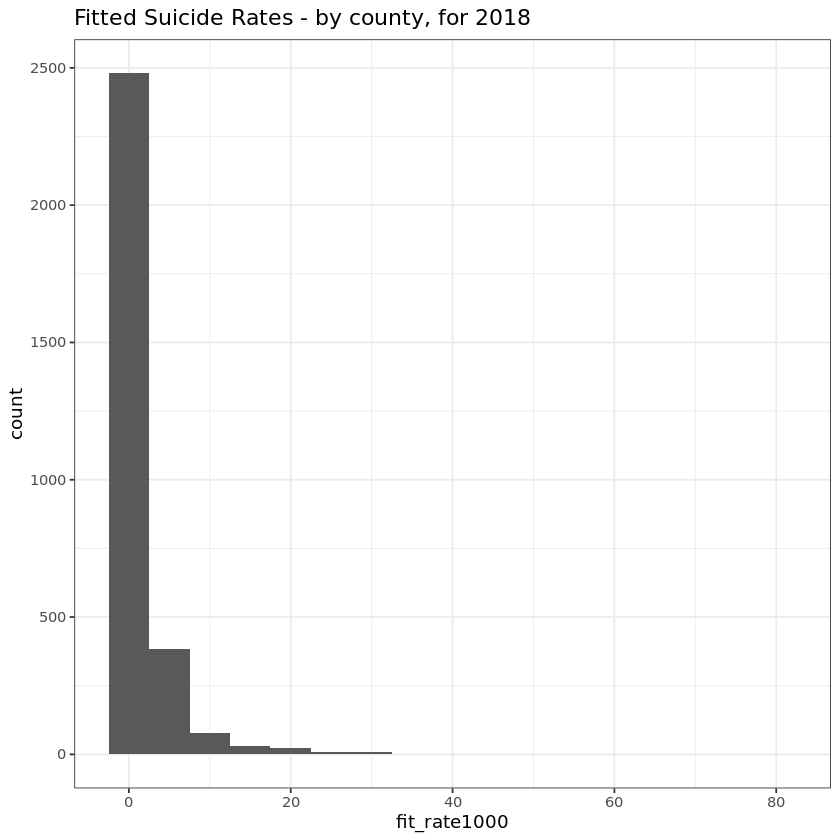

In [74]:
# histogram of fitted rate
# could be used to decide what constitues a high suicide rate, cutoff?
results_df %>% ggplot(aes(x=fit_rate1000)) + 
    geom_histogram(binwidth=5) +
    theme_bw() + 
    ggtitle("Fitted Suicide Rates - by county, for 2018")

# RMSE


In [45]:
caret::RMSE(fitted_values,true_values)
caret::RMSE(results_df$fit_rate1000,results_df$true_rate1000)

[1] 13.71173

[1] 1.999662